In [204]:
import pandas as pd
import numpy as np
import acquire
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle
from scipy import stats

**Lets acquire data using the get_data function from acquire module**

In [205]:


zillow = acquire.get_data()

**Lets take a look at our dataframe**

In [206]:
zillow.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,regionidcounty,regionidzip,finishedsquarefeet12,fips,fullbathcnt,lotsizesquarefeet,propertylandusedesc,transactiondate,taxamount,taxvaluedollarcnt
0,2061546,11289917,2.0,3.0,2.0,3101.0,97318.0,1458.0,6037.0,2.0,8284.0,Single Family Residential,2017-06-23,2319.90,136104.0
1,1834372,11705026,1.0,2.0,1.0,3101.0,96018.0,1421.0,6037.0,1.0,6707.0,Single Family Residential,2017-06-30,543.69,35606.0
2,1923117,14269464,3.0,4.0,3.0,1286.0,96958.0,2541.0,6059.0,3.0,4975.0,Single Family Residential,2017-06-01,9819.72,880456.0
3,2121349,11389003,2.0,3.0,2.0,3101.0,96037.0,1650.0,6037.0,2.0,7300.0,Single Family Residential,2017-06-01,7673.19,614000.0
4,2093710,11967869,1.0,2.0,1.0,3101.0,96023.0,693.0,6037.0,1.0,2908.0,Single Family Residential,2017-06-29,3267.47,274237.0


**Getting some information about our data**

In [207]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15035 non-null  int64  
 1   parcelid              15035 non-null  int64  
 2   bathroomcnt           15035 non-null  float64
 3   bedroomcnt            15035 non-null  float64
 4   calculatedbathnbr     14989 non-null  float64
 5   regionidcounty        15035 non-null  float64
 6   regionidzip           15026 non-null  float64
 7   finishedsquarefeet12  14968 non-null  float64
 8   fips                  15035 non-null  float64
 9   fullbathcnt           14989 non-null  float64
 10  lotsizesquarefeet     14931 non-null  float64
 11  propertylandusedesc   15035 non-null  object 
 12  transactiondate       15035 non-null  object 
 13  taxamount             15035 non-null  float64
 14  taxvaluedollarcnt     15035 non-null  float64
dtypes: float64(11), int

**Takeaways:**
- shape = 15035, 15
- some null values
- few object type that might need conversion

## Preparation Phase

**Lets check for null values**

In [208]:
zillow.isnull().sum()

id                        0
parcelid                  0
bathroomcnt               0
bedroomcnt                0
calculatedbathnbr        46
regionidcounty            0
regionidzip               9
finishedsquarefeet12     67
fips                      0
fullbathcnt              46
lotsizesquarefeet       104
propertylandusedesc       0
transactiondate           0
taxamount                 0
taxvaluedollarcnt         0
dtype: int64

**both fullbathcnt and calculatedbathnbr have 46 missing values, lets see if they are for same observations**

In [209]:



zillow.sort_values(by = 'calculatedbathnbr').tail(50)

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,regionidcounty,regionidzip,finishedsquarefeet12,fips,fullbathcnt,lotsizesquarefeet,propertylandusedesc,transactiondate,taxamount,taxvaluedollarcnt
6930,1510914,11655138,9.0,6.0,9.0,3101.0,96086.0,15450.0,6037.0,9.0,165088.0,Single Family Residential,2017-05-31,121131.53,10071018.0
14423,2004396,11995760,9.0,7.0,9.0,3101.0,96017.0,7481.0,6037.0,9.0,7425.0,Single Family Residential,2017-06-30,43608.22,3617167.0
12132,2731480,11095530,10.0,10.0,10.0,3101.0,96339.0,4294.0,6037.0,10.0,16695.0,Single Family Residential,2017-06-22,8871.35,812200.0
3868,1824424,11640165,11.0,7.0,11.0,3101.0,96086.0,11478.0,6037.0,11.0,33617.0,Single Family Residential,2017-05-17,181533.24,15623925.0
5,496818,11696784,0.0,0.0,NaN,3101.0,96024.0,1378.0,6037.0,NaN,7500.0,Single Family Residential,2017-06-16,2135.39,168828.0
111,2323388,14252582,2.5,3.0,NaN,1286.0,97006.0,NaN,6059.0,NaN,18719.0,Single Family Residential,2017-05-01,2079.52,162456.0
209,2434313,11392193,0.0,0.0,NaN,3101.0,96024.0,2276.0,6037.0,NaN,10772.0,Single Family Residential,2017-05-01,1609.95,101792.0
280,1071389,14466991,0.0,0.0,NaN,1286.0,96989.0,NaN,6059.0,NaN,105970.0,Single Family Residential,2017-05-01,25740.28,2493444.0
293,2776735,11266326,0.0,0.0,NaN,3101.0,97319.0,400.0,6037.0,NaN,55016.0,Single Family Residential,2017-05-01,703.30,49627.0
746,1735776,11938527,0.0,0.0,NaN,3101.0,95993.0,389.0,6037.0,NaN,7681.0,Single Family Residential,2017-05-03,4059.62,319396.0


In [210]:
# turns out they are so we can drop these observations

zillow = zillow[~zillow.fullbathcnt.isna()]

In [211]:
zillow.isnull().sum()

# lets drop null observations for finishedsquarefeet12 columns

zillow = zillow[~zillow.finishedsquarefeet12.isna()]

zillow.sort_values(by = 'lotsizesquarefeet', ascending = False).tail(50)


#imputing value for lotsizesquare using mode, median or average will affect the data as they come out to be 
#higher so we will just drop them


zillow = zillow[~zillow.lotsizesquarefeet.isna()]

In [212]:
zillow = zillow[~zillow.regionidzip.isna()]

In [213]:
zillow.isnull().sum()

id                      0
parcelid                0
bathroomcnt             0
bedroomcnt              0
calculatedbathnbr       0
regionidcounty          0
regionidzip             0
finishedsquarefeet12    0
fips                    0
fullbathcnt             0
lotsizesquarefeet       0
propertylandusedesc     0
transactiondate         0
taxamount               0
taxvaluedollarcnt       0
dtype: int64

In [214]:
print(len(zillow))

print((zillow.bathroomcnt == zillow.calculatedbathnbr).sum())

# basically number of bathrooms and calculatedbathnbr mean the same thing so we can drop one of these column

14849
14849


In [215]:
# since all of these observations are for single family home, and their transaction took place between the month of may and
# june of 2017. We can drop these columns. Also, they wont mean anything to our model and id is also not a significant columns for us



zillow = zillow.drop(columns = ['propertylandusedesc', 'fullbathcnt','transactiondate', 'parcelid', 'id', 'calculatedbathnbr'])

In [216]:
# renaming the column for more readeability

zillow = zillow.rename(columns = {'bathroomcnt':'numberofbathrooms', 'bedroomcnt':'numberofbedrooms', 
                         'regionidcounty':'countyid', 'regionidzip':'zipcode', 'finishedsquarefeet12':'size_in_squarefeet', 
                        'lotsizesquarefeet':'lotsize', 'taxamount': 'tax', 
                        'taxvaluedollarcnt':'property_value'})

In [217]:
zillow

,numberofbathrooms,numberofbedrooms,countyid,zipcode,size_in_squarefeet,fips,lotsize,tax,property_value
0,2.0,3.0,3101.0,97318.0,1458.0,6037.0,8284.0,2319.90,136104.0
1,1.0,2.0,3101.0,96018.0,1421.0,6037.0,6707.0,543.69,35606.0
2,3.0,4.0,1286.0,96958.0,2541.0,6059.0,4975.0,9819.72,880456.0
3,2.0,3.0,3101.0,96037.0,1650.0,6037.0,7300.0,7673.19,614000.0
4,1.0,2.0,3101.0,96023.0,693.0,6037.0,2908.0,3267.47,274237.0
...,...,...,...,...,...,...,...,...,...
15030,3.0,5.0,1286.0,97018.0,2526.0,6059.0,7800.0,5718.72,458903.0
15031,3.0,5.0,1286.0,97067.0,2735.0,6059.0,7100.0,1465.88,115387.0
15032,2.0,3.0,3101.0,96523.0,1536.0,6037.0,8818.0,3519.78,297097.0
15033,3.0,5.0,1286.0,97065.0,2655.0,6059.0,6000.0,8065.50,746963.0


In [218]:
# trying to calulate the tax rate for these properties and creating a separate columns that stores the tax rate



zillow['tax_rate'] = (zillow.tax/zillow.property_value) * 100

zillow.sort_values(by = 'tax_rate', ascending = False)

,numberofbathrooms,numberofbedrooms,countyid,zipcode,size_in_squarefeet,fips,lotsize,tax,property_value,tax_rate
9762,1.0,2.0,3101.0,96023.0,572.0,6037.0,2968.0,9544.07,21074.0,45.288365
1123,1.0,3.0,2061.0,97089.0,1504.0,6111.0,96658.0,17582.50,59629.0,29.486491
3477,2.0,3.0,3101.0,96361.0,1186.0,6037.0,9464.0,13096.41,47163.0,27.768399
7895,2.0,3.0,3101.0,96523.0,1754.0,6037.0,12027.0,11541.02,56697.0,20.355610
5553,2.0,3.0,3101.0,96486.0,1488.0,6037.0,8451.0,24234.62,132742.0,18.256935
...,...,...,...,...,...,...,...,...,...,...
5312,2.0,3.0,1286.0,96964.0,1185.0,6059.0,6250.0,1008.26,588818.0,0.171235
4539,2.0,3.0,3101.0,96436.0,1372.0,6037.0,7560.0,120.84,81141.0,0.148926
3403,1.0,2.0,3101.0,96127.0,936.0,6037.0,5750.0,963.15,866785.0,0.111118
11026,3.0,3.0,3101.0,96030.0,2178.0,6037.0,6341.0,1928.38,1800000.0,0.107132


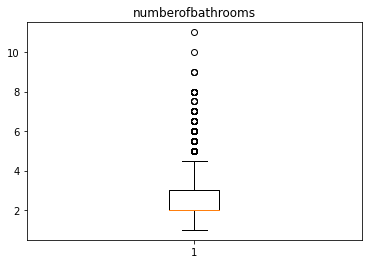

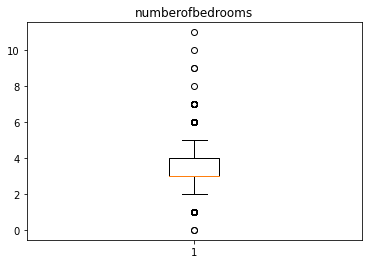

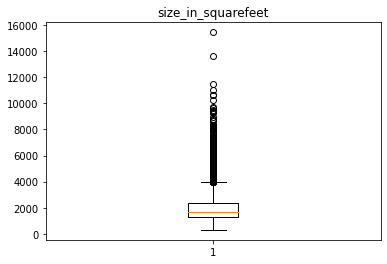

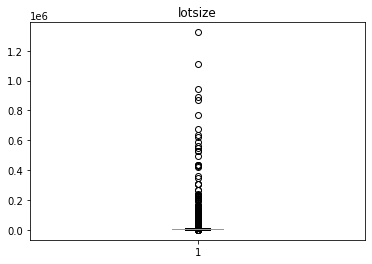

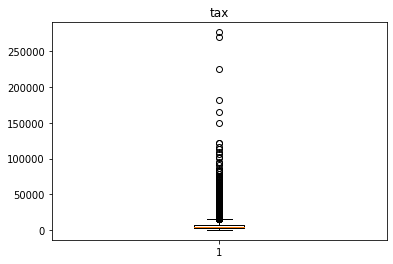

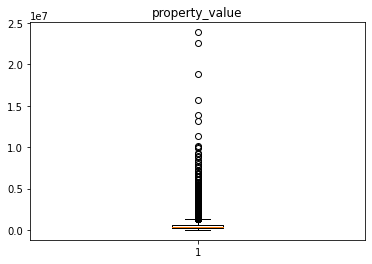

In [219]:
# lets check if there are any outliers in our data


# plt.figure(figsize = (15,20))


for col in ['numberofbathrooms', 'numberofbedrooms', 'size_in_squarefeet', 'lotsize', 'tax', 'property_value']:
    plt.boxplot(zillow[col])
    plt.title(col)
    plt.show()
# plt.boxplot(zillow.property_value)
# plt.show()

<AxesSubplot:>

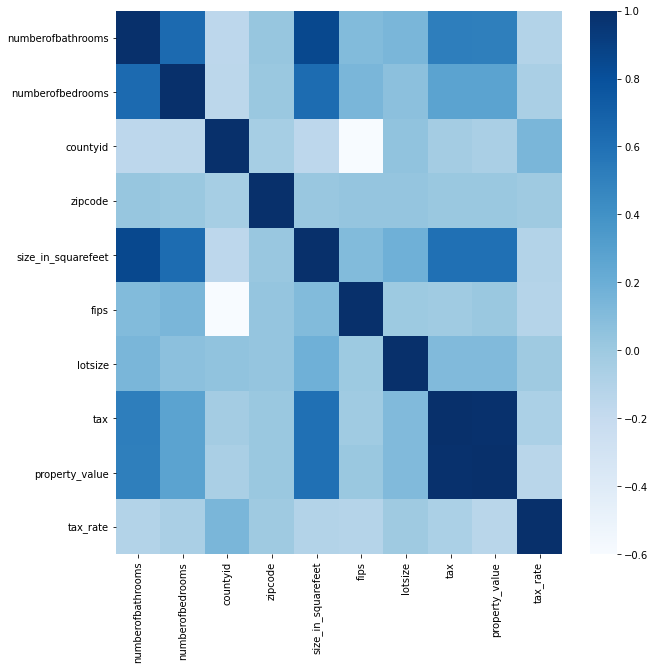

In [220]:

plt.figure(figsize = (10,10))
sns.heatmap(zillow.corr(), cmap = 'Blues')

<AxesSubplot:xlabel='property_value'>

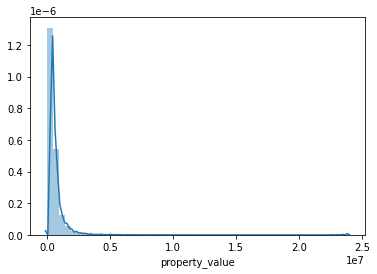

In [221]:
sns.distplot(zillow.property_value)

In [222]:
# there are some outliers in the data. So, we will remove them 

q1 = zillow.property_value.quantile(0.25)
q3 = zillow.property_value.quantile(0.75)

iqr = q3-q1

upper_outlier_mark = q3 + (1.5 * iqr)

zillow = zillow[zillow.property_value < upper_outlier_mark]


zillow

,numberofbathrooms,numberofbedrooms,countyid,zipcode,size_in_squarefeet,fips,lotsize,tax,property_value,tax_rate
0,2.0,3.0,3101.0,97318.0,1458.0,6037.0,8284.0,2319.90,136104.0,1.704505
1,1.0,2.0,3101.0,96018.0,1421.0,6037.0,6707.0,543.69,35606.0,1.526962
2,3.0,4.0,1286.0,96958.0,2541.0,6059.0,4975.0,9819.72,880456.0,1.115299
3,2.0,3.0,3101.0,96037.0,1650.0,6037.0,7300.0,7673.19,614000.0,1.249705
4,1.0,2.0,3101.0,96023.0,693.0,6037.0,2908.0,3267.47,274237.0,1.191477
...,...,...,...,...,...,...,...,...,...,...
15030,3.0,5.0,1286.0,97018.0,2526.0,6059.0,7800.0,5718.72,458903.0,1.246172
15031,3.0,5.0,1286.0,97067.0,2735.0,6059.0,7100.0,1465.88,115387.0,1.270403
15032,2.0,3.0,3101.0,96523.0,1536.0,6037.0,8818.0,3519.78,297097.0,1.184724
15033,3.0,5.0,1286.0,97065.0,2655.0,6059.0,6000.0,8065.50,746963.0,1.079772


<AxesSubplot:xlabel='property_value'>

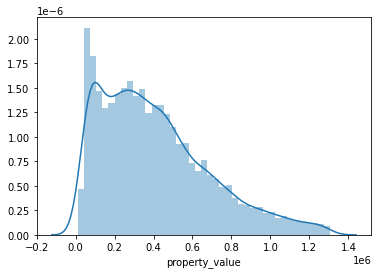

In [223]:
sns.distplot(zillow.property_value)

<AxesSubplot:xlabel='property_value'>

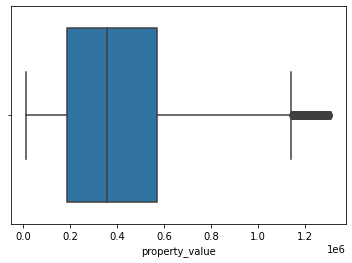

In [224]:
sns.boxplot(zillow.property_value)

#### We can get the fips information from following website
#### https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt
so,

6037: LA, 

6059: Orange,

6111: Ventura

### we will replace fips with these values 


In [225]:
zillow

,numberofbathrooms,numberofbedrooms,countyid,zipcode,size_in_squarefeet,fips,lotsize,tax,property_value,tax_rate
0,2.0,3.0,3101.0,97318.0,1458.0,6037.0,8284.0,2319.90,136104.0,1.704505
1,1.0,2.0,3101.0,96018.0,1421.0,6037.0,6707.0,543.69,35606.0,1.526962
2,3.0,4.0,1286.0,96958.0,2541.0,6059.0,4975.0,9819.72,880456.0,1.115299
3,2.0,3.0,3101.0,96037.0,1650.0,6037.0,7300.0,7673.19,614000.0,1.249705
4,1.0,2.0,3101.0,96023.0,693.0,6037.0,2908.0,3267.47,274237.0,1.191477
...,...,...,...,...,...,...,...,...,...,...
15030,3.0,5.0,1286.0,97018.0,2526.0,6059.0,7800.0,5718.72,458903.0,1.246172
15031,3.0,5.0,1286.0,97067.0,2735.0,6059.0,7100.0,1465.88,115387.0,1.270403
15032,2.0,3.0,3101.0,96523.0,1536.0,6037.0,8818.0,3519.78,297097.0,1.184724
15033,3.0,5.0,1286.0,97065.0,2655.0,6059.0,6000.0,8065.50,746963.0,1.079772


In [226]:
zillow.fips = zillow.fips.astype(int)



zillow = zillow.replace({'fips':{6037: 'LA', 6059: 'Orange', 6111: 'Ventura'}})

zillow = zillow.rename(columns = {'fips': 'County'})
zillow

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,numberofbathrooms,numberofbedrooms,countyid,zipcode,size_in_squarefeet,County,lotsize,tax,property_value,tax_rate
0,2.0,3.0,3101.0,97318.0,1458.0,LA,8284.0,2319.90,136104.0,1.704505
1,1.0,2.0,3101.0,96018.0,1421.0,LA,6707.0,543.69,35606.0,1.526962
2,3.0,4.0,1286.0,96958.0,2541.0,Orange,4975.0,9819.72,880456.0,1.115299
3,2.0,3.0,3101.0,96037.0,1650.0,LA,7300.0,7673.19,614000.0,1.249705
4,1.0,2.0,3101.0,96023.0,693.0,LA,2908.0,3267.47,274237.0,1.191477
...,...,...,...,...,...,...,...,...,...,...
15030,3.0,5.0,1286.0,97018.0,2526.0,Orange,7800.0,5718.72,458903.0,1.246172
15031,3.0,5.0,1286.0,97067.0,2735.0,Orange,7100.0,1465.88,115387.0,1.270403
15032,2.0,3.0,3101.0,96523.0,1536.0,LA,8818.0,3519.78,297097.0,1.184724
15033,3.0,5.0,1286.0,97065.0,2655.0,Orange,6000.0,8065.50,746963.0,1.079772


<AxesSubplot:xlabel='County'>

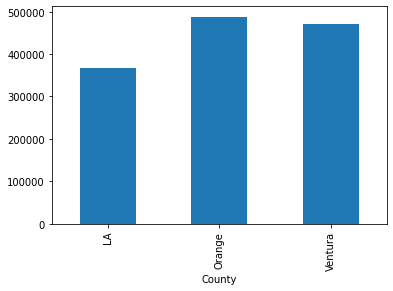

In [227]:
zillow.groupby(zillow.County).property_value.mean().plot(kind = 'bar')

**Hypothesis**

**County influences home value**

$H_0$: There is no relationship between County and home value

$H_a$: County influences home value

$a$: 0.05

In [228]:
# Since we are comparing a categorical and continuous variable, we must use T-test to compare the mean home values
# of different counties

a = 0.05


# from the vizualization above, we can see the home value in LA county is significantly lower, so we will compare the
# mean home value between la county and not la county

x1 = zillow[zillow.County =='LA'].property_value

x2 = zillow[zillow.County !='LA'].property_value


t, p = stats.ttest_ind(x1, x2)

t, p

if (t < 0) and (p < a):
    print('We reject the null hypothesis and the home value in LA county are significantly lower than other counties')
else:
    print('We fail to reject the null hypothesis')


We reject the null hypothesis and the home value in LA county are significantly lower than other counties


In [229]:
dummies = pd.get_dummies(zillow.County)

In [230]:
zillow = pd.concat([zillow, dummies], axis = 1)

In [231]:
zillow = zillow.drop(columns = 'County')

In [232]:
zillow.sort_values(by = 'numberofbedrooms', ascending = True)

,numberofbathrooms,numberofbedrooms,countyid,zipcode,size_in_squarefeet,lotsize,tax,property_value,tax_rate,LA,Orange,Ventura
187,1.0,0.0,3101.0,95993.0,740.0,28817.0,2399.69,188000.0,1.276431,1,0,0
3048,1.0,0.0,3101.0,95995.0,890.0,7339.0,1307.77,100000.0,1.307770,1,0,0
10580,1.0,1.0,1286.0,96969.0,480.0,2840.0,10822.90,989868.0,1.093368,0,1,0
14433,2.0,1.0,3101.0,96006.0,874.0,6489.0,3187.25,257034.0,1.240011,1,0,0
9539,1.0,1.0,3101.0,95997.0,865.0,2090.0,5482.71,450000.0,1.218380,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8737,2.0,7.0,3101.0,96014.0,2648.0,6497.0,3501.94,267010.0,1.311539,1,0,0
13079,4.0,7.0,3101.0,96230.0,2769.0,6219.0,5594.97,419806.0,1.332751,1,0,0
11119,3.0,8.0,3101.0,96387.0,3308.0,19827.0,11795.09,966530.0,1.220354,1,0,0
12132,10.0,10.0,3101.0,96339.0,4294.0,16695.0,8871.35,812200.0,1.092262,1,0,0


In [233]:
zillow = zillow[zillow.numberofbedrooms<7]

In [234]:
zillow = zillow[zillow.numberofbathrooms < 6]

In [235]:
zillow = zillow[zillow.numberofbedrooms!=0]

In [236]:
zillow

,numberofbathrooms,numberofbedrooms,countyid,zipcode,size_in_squarefeet,lotsize,tax,property_value,tax_rate,LA,Orange,Ventura
0,2.0,3.0,3101.0,97318.0,1458.0,8284.0,2319.90,136104.0,1.704505,1,0,0
1,1.0,2.0,3101.0,96018.0,1421.0,6707.0,543.69,35606.0,1.526962,1,0,0
2,3.0,4.0,1286.0,96958.0,2541.0,4975.0,9819.72,880456.0,1.115299,0,1,0
3,2.0,3.0,3101.0,96037.0,1650.0,7300.0,7673.19,614000.0,1.249705,1,0,0
4,1.0,2.0,3101.0,96023.0,693.0,2908.0,3267.47,274237.0,1.191477,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15030,3.0,5.0,1286.0,97018.0,2526.0,7800.0,5718.72,458903.0,1.246172,0,1,0
15031,3.0,5.0,1286.0,97067.0,2735.0,7100.0,1465.88,115387.0,1.270403,0,1,0
15032,2.0,3.0,3101.0,96523.0,1536.0,8818.0,3519.78,297097.0,1.184724,1,0,0
15033,3.0,5.0,1286.0,97065.0,2655.0,6000.0,8065.50,746963.0,1.079772,0,1,0


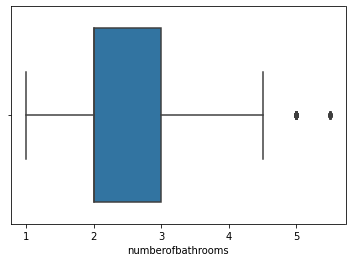

<AxesSubplot:xlabel='numberofbedrooms'>

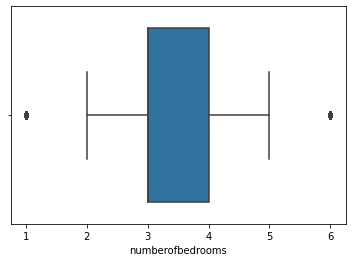

In [237]:
sns.boxplot(zillow.numberofbathrooms)
plt.show()

sns.boxplot(zillow.numberofbedrooms)

In [238]:
zillow.numberofbathrooms.value_counts()

2.0    6033
3.0    2894
1.0    2574
2.5    1128
4.0     471
1.5     234
3.5     233
4.5     119
5.0     112
5.5      16
Name: numberofbathrooms, dtype: int64

In [239]:
zillow.numberofbedrooms.value_counts()

3.0    6368
4.0    4013
2.0    2252
5.0     902
1.0     160
6.0     119
Name: numberofbedrooms, dtype: int64

In [240]:
zillow = zillow.drop(columns = 'tax_rate')


train, test, validate = wrangle.split_data(zillow)

In [241]:
train.shape, test.shape, validate.shape

train

,numberofbathrooms,numberofbedrooms,countyid,zipcode,size_in_squarefeet,lotsize,tax,property_value,LA,Orange,Ventura
4038,3.0,5.0,3101.0,96522.0,2100.0,10630.0,6751.58,570278.0,1,0,0
2680,3.0,4.0,3101.0,96330.0,2235.0,12562.0,5586.33,497836.0,1,0,0
7189,2.0,3.0,1286.0,96180.0,1192.0,7590.0,2482.10,201476.0,0,1,0
185,2.0,2.0,3101.0,96020.0,1895.0,5741.0,6534.81,542048.0,1,0,0
11121,1.0,2.0,3101.0,95983.0,864.0,6752.0,2449.26,176181.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6815,2.0,3.0,3101.0,96411.0,1602.0,8947.0,3915.11,312068.0,1,0,0
7417,2.0,3.0,3101.0,96514.0,1459.0,5921.0,4419.92,348727.0,1,0,0
7134,2.0,3.0,3101.0,96494.0,1412.0,7960.0,5694.34,488654.0,1,0,0
9072,2.5,3.0,1286.0,96962.0,2022.0,6200.0,3825.68,370137.0,0,1,0


## Exploration Phase

<Figure size 1080x1080 with 0 Axes>

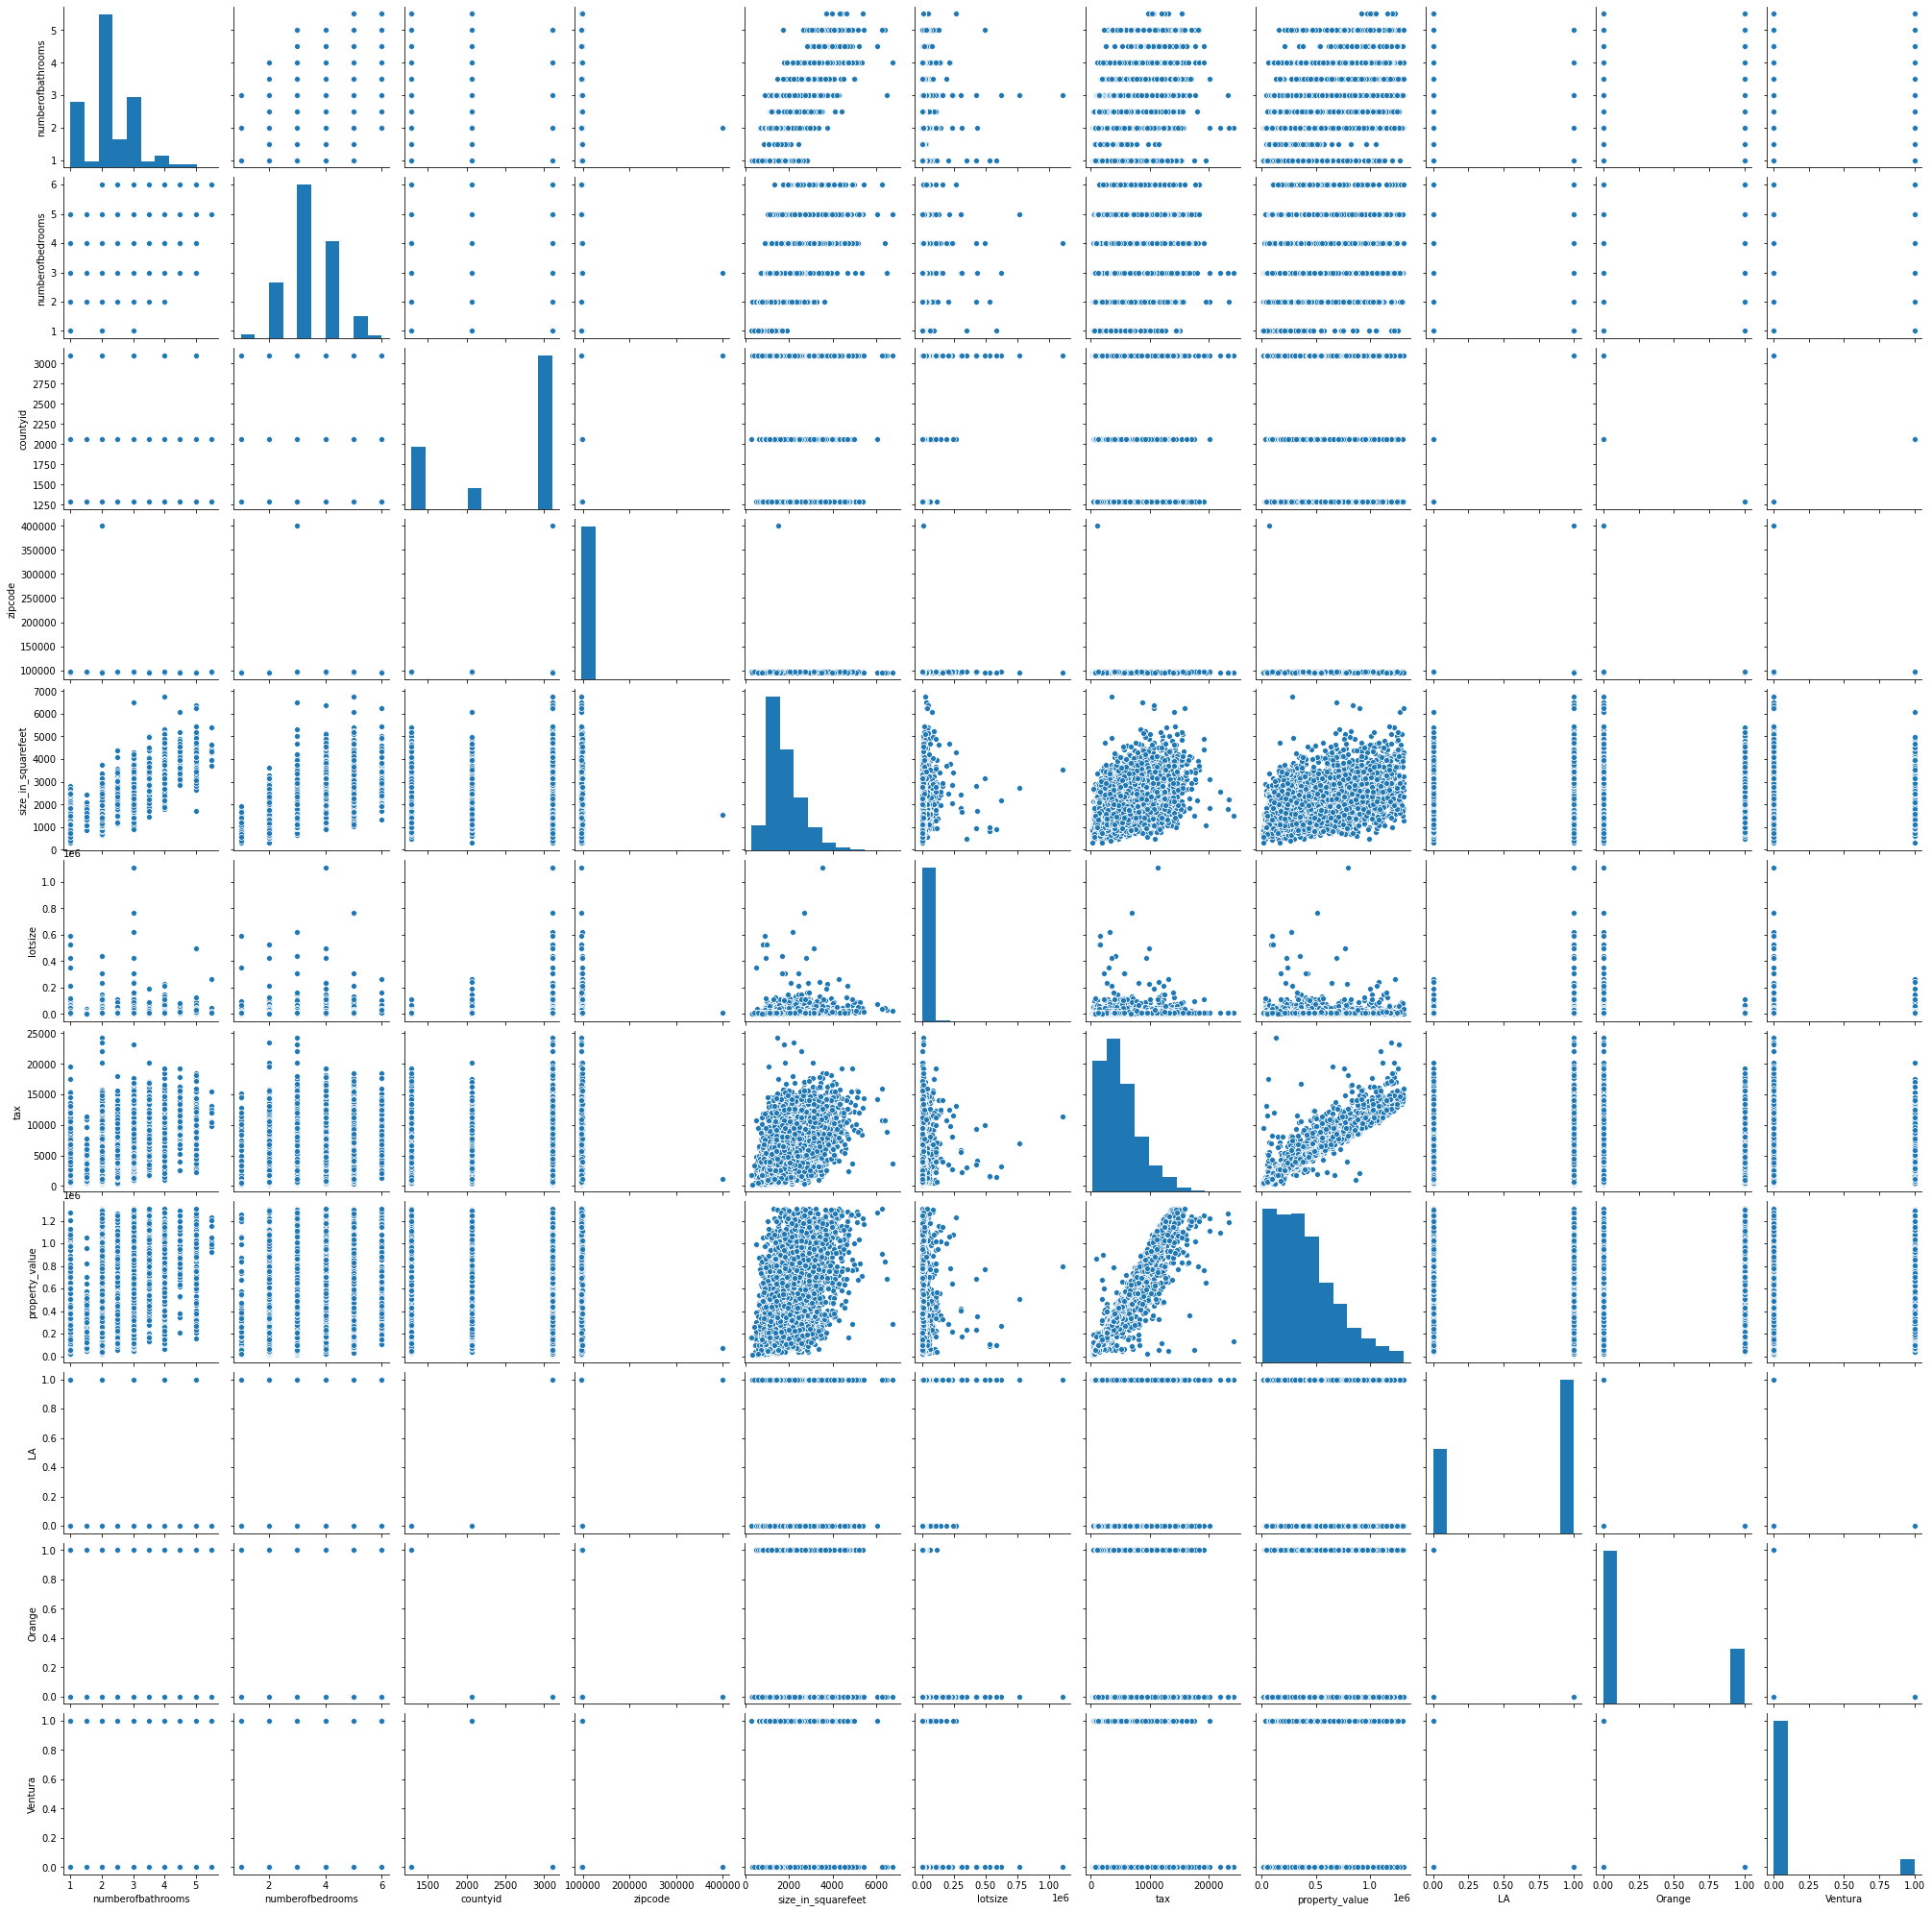

In [242]:
plt.figure(figsize = (15,15))

sns.pairplot(train)

<AxesSubplot:>

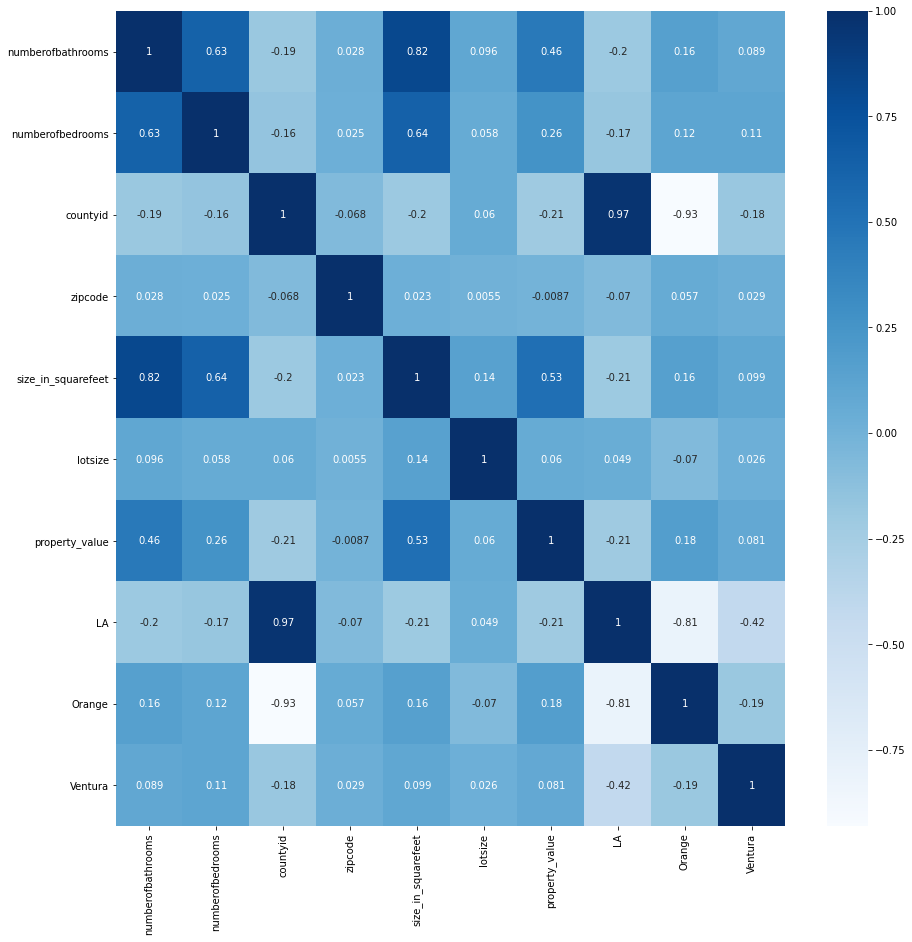

In [243]:

# lets plot a heat map of the correlation


plt.figure(figsize = (15,15))

sns.heatmap(train.drop(columns = [ 'tax']).corr(), cmap = 'Blues', annot = True)

### Takeaways:
- We can see a strong correlation between property value and full bath count, size in square feet, number of bathrooms, and number of bedrooms

### Hypothesis

**1. size of the single family unit in square feet affect the price of the property**

- both of these variables are continuous so, we must conduct pearson r hypothesis test

$H_0$: The size in square feet and the price of the property are independent of each other

$H_a$: The size in square feet and the price of the property are dependent of each other

In [244]:
from scipy import stats

In [245]:
# setting our significance level

a = 0.05

r, p = stats.pearsonr(train.size_in_squarefeet, train.property_value)

r, p

(0.5309019048069188, 0.0)

In [246]:
if p < a:
    print("We reject the null hypothesis")
else:
    print('we fail to reject the null hypothesis')

We reject the null hypothesis


### Takeaways:
- our p is low so we reject the null hypothesis that size in square feet and property value are independent of each other
- our r value os 0.53, indicating a correlation

<AxesSubplot:xlabel='numberofbathrooms'>

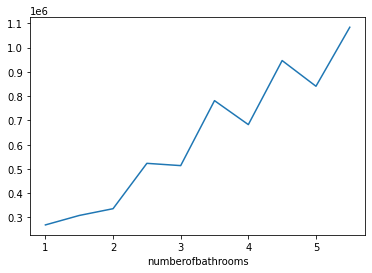

In [247]:
train.groupby(train.numberofbathrooms).property_value.mean().plot()

<AxesSubplot:xlabel='numberofbedrooms'>

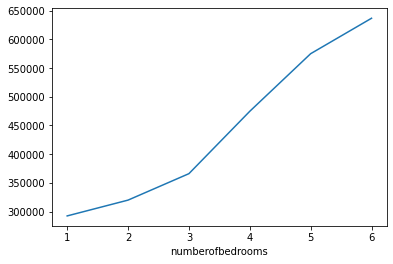

In [248]:
train.groupby(train.numberofbedrooms).property_value.mean().plot()

**the number of bedrooms has a strong relationship with the price of homes**

In [249]:
train.numberofbathrooms.value_counts()

2.0    3883
3.0    1789
1.0    1662
2.5     721
4.0     312
3.5     156
1.5     149
5.0      85
4.5      74
5.5       9
Name: numberofbathrooms, dtype: int64

<AxesSubplot:xlabel='numberofbathrooms'>

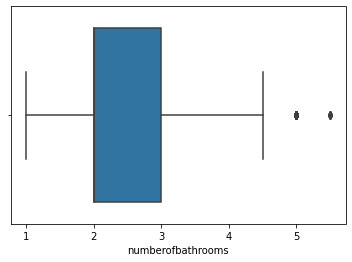

In [250]:
sns.boxplot(train.numberofbathrooms)

## Modeling
**Lets scale the data first**

In [251]:
from sklearn.preprocessing import MinMaxScaler

In [252]:
train.numberofbathrooms.value_counts()

2.0    3883
3.0    1789
1.0    1662
2.5     721
4.0     312
3.5     156
1.5     149
5.0      85
4.5      74
5.5       9
Name: numberofbathrooms, dtype: int64

In [253]:
train.numberofbedrooms.value_counts()

3.0    4032
4.0    2559
2.0    1478
5.0     581
1.0     105
6.0      85
Name: numberofbedrooms, dtype: int64

In [254]:
x_train = train.drop(columns = ['tax', 'property_value'])
y_train = train[['property_value']]

x_validate = validate.drop(columns = ['tax', 'property_value'])
y_validate = validate[['property_value']]


x_test = test.drop(columns = ['tax', 'property_value'])
y_test = test[['property_value']]

In [255]:
scaler = MinMaxScaler()

cols_to_scale = x_train.columns

x_train_scaled, x_test_scaled, x_validate_scaled = wrangle.scale_data(x_train, x_test, x_validate, scaler = scaler,
                                                                      cols_to_scale = cols_to_scale)

In [256]:
x_train_scaled

,numberofbathrooms_scaled,numberofbedrooms_scaled,countyid_scaled,zipcode_scaled,size_in_squarefeet_scaled,lotsize_scaled,LA_scaled,Orange_scaled,Ventura_scaled
4038,0.444444,0.8,1.000000,0.001778,0.278810,0.008990,1.0,0.0,0.0
2680,0.444444,0.6,1.000000,0.001146,0.299721,0.010728,1.0,0.0,0.0
7189,0.222222,0.4,0.000000,0.000652,0.138166,0.006254,0.0,1.0,0.0
185,0.222222,0.2,1.000000,0.000125,0.247057,0.004590,1.0,0.0,0.0
11121,0.000000,0.2,1.000000,0.000003,0.087361,0.005500,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6815,0.222222,0.4,1.000000,0.001413,0.201673,0.007475,1.0,0.0,0.0
7417,0.222222,0.4,1.000000,0.001752,0.179523,0.004752,1.0,0.0,0.0
7134,0.222222,0.4,1.000000,0.001686,0.172243,0.006587,1.0,0.0,0.0
9072,0.333333,0.4,0.000000,0.003227,0.266729,0.005003,0.0,1.0,0.0


361105.01504022384
488811.79390296264
477778.45901639346


10504.0
27918.0
35121.0


In [259]:
print(train[train.LA == 1].property_value.median())

print(train[train.Orange == 1].property_value.median())

print(train[train.Ventura == 1].property_value.median())

297976.0
456247.0
440165.0


### Lets build model

In [260]:
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import RFE

### Baseline First

In [261]:
y_train.median()

property_value    351070.0
dtype: float64

In [262]:
## we will use the median as our baseline

baseline = y_train.median()


# predicting using our baseline
y_baseline_pred = np.full(len(y_train), baseline)

baseline_rmse = (mean_squared_error(y_train, y_baseline_pred)) ** (1/2)

baseline_rmse

286498.8581858487

In [263]:
x_vars = x_train_scaled[['numberofbathrooms_scaled', 'numberofbedrooms_scaled', 'size_in_squarefeet_scaled']]

x_vars

,numberofbathrooms_scaled,numberofbedrooms_scaled,size_in_squarefeet_scaled
4038,0.444444,0.8,0.278810
2680,0.444444,0.6,0.299721
7189,0.222222,0.4,0.138166
185,0.222222,0.2,0.247057
11121,0.000000,0.2,0.087361
...,...,...,...
6815,0.222222,0.4,0.201673
7417,0.222222,0.4,0.179523
7134,0.222222,0.4,0.172243
9072,0.333333,0.4,0.266729


## Modeling with only three selected features

### Linear Regression Model

In [264]:
lm = LinearRegression(normalize = True)
lm = lm.fit(x_vars, y_train)

y_lm_pred = lm.predict(x_vars)

lm_rmse = (mean_squared_error(y_train, y_lm_pred)) **(1/2)

lm_rmse

236134.15069726598

In [265]:
xvs_lm = explained_variance_score(y_train, y_lm_pred)
xvs_lm

0.2955204044762191

### LassoLars

In [266]:
# create the object
lars = LassoLars(alpha = 0)


# fit the object
lars = lars.fit(x_vars, y_train)


# predict with the object
y_lars_pred = lars.predict(x_vars)


# calculate the rmse
lars_rmse = (mean_squared_error(y_train, y_lars_pred)) **(1/2)

lars_rmse

236134.15069726598

In [267]:
xvs_lars = explained_variance_score(y_train, y_lars_pred)
xvs_lars

0.2955204044762191

### Polynomial + Linear Reg

In [268]:
# lets try polynomial features with linear regression


# create polynomial object
pf = PolynomialFeatures(degree = 2)

# fitting the object
pf = pf.fit(x_vars)


# transforming our training data set
x_vars_squared = pf.transform(x_vars)



# lets get the Linear Regression

lm_squared = LinearRegression()


# fit the linear regression object

lm_squared = lm_squared.fit(x_vars_squared, y_train)

#predict with the object

y_lm_squared_pred = lm_squared.predict(x_vars_squared)


# lets get rmse

lm_squared_rmse = (mean_squared_error(y_train, y_lm_squared_pred)) **(1/2)

lm_squared_rmse

235571.25701520618

In [269]:
xvs_lm_squared = explained_variance_score(y_train, y_lm_squared_pred)
xvs_lm_squared

0.2988750608884888

### RMSE for different algorithms

In [270]:
print(f'The Baseline RMSE: {baseline_rmse}')
print(f'The Linear model  RMSE: {lm_rmse}')
print(f'The LassoLars RMSE: {lars_rmse}')
print(f'The Polynomial features RMSE: {lm_squared_rmse}')

The Baseline RMSE: 286498.8581858487
The Linear model  RMSE: 236134.15069726598
The LassoLars RMSE: 236134.15069726598
The Polynomial features RMSE: 235571.25701520618


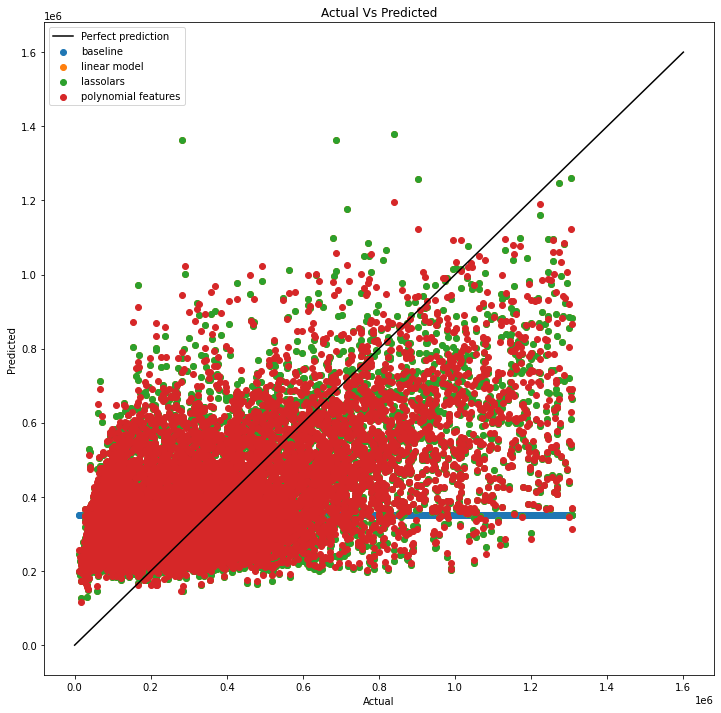

In [271]:
# lets try to plot these values

plt.figure(figsize = (12,12))
plt.scatter(y_train, y_baseline_pred, label = 'baseline')

plt.scatter(y_train, y_lm_pred, label = 'linear model')

plt.scatter(y_train, y_lars_pred, label = 'lassolars')


plt.scatter(y_train, y_lm_squared_pred, label = 'polynomial features')

plt.plot([0, 1600000], [0, 1600000], ls = "-" , c = 'black', label = 'Perfect prediction')

plt.xlabel("Actual")

plt.ylabel("Predicted")

plt.title('Actual Vs Predicted')

plt.legend()

plt.show()

## We will run all the models we created using three variables through our validate data. 

In [280]:
# Validating with linear regression model
y_validate = validate[['property_value']]


x_validate_vars = x_validate_scaled[['numberofbathrooms_scaled', 'numberofbedrooms_scaled', 
                                     'size_in_squarefeet_scaled']]

y_validate_lm_pred = lm.predict(x_validate_vars)


val_lm_rmse = (mean_squared_error(y_validate, y_validate_lm_pred)) ** (1/2)

val_lm_rmse

235086.51599159447

In [281]:
# validate with lassolars

y_validate_lars_pred = lars.predict(x_validate_vars)


val_lars_rmse = (mean_squared_error(y_validate, y_validate_lars_pred)) ** (1/2)

val_lars_rmse

235086.51599159447

In [282]:
# lets try polynomial features with linear regression





# transforming our validate data set
x_val_vars_squared = pf.transform(x_validate_vars)










#predict with the object

y_val_lm_squared_pred = lm_squared.predict(x_val_vars_squared)


# lets get rmse

lm_squared_val_rmse = (mean_squared_error(y_validate, y_val_lm_squared_pred)) **(1/2)

lm_squared_val_rmse

234729.33978092275

In [283]:
xvs_val = explained_variance_score(y_validate, y_val_lm_squared_pred )

xvs_val

0.2863685425276734

In [284]:
print(f'The Baseline RMSE: {baseline_rmse}')
print(f'The Linear model  RMSE: {val_lm_rmse}')
print(f'The LassoLars RMSE: {val_lars_rmse}')
print(f'The Polynomial features RMSE: {lm_squared_val_rmse}')

The Baseline RMSE: 286498.8581858487
The Linear model  RMSE: 235086.51599159447
The LassoLars RMSE: 235086.51599159447
The Polynomial features RMSE: 234729.33978092275


## Our polynomial feature + linear reg model with 2nd degree performed better with our validate data
**So we will use this to run on our test data**


In [285]:
y_test = test[['property_value']]


x_test_vars = x_test_scaled[['numberofbathrooms_scaled', 'numberofbedrooms_scaled', 
                                     'size_in_squarefeet_scaled']]

In [286]:
# transforming our validate data set
x_test_vars_squared = pf.transform(x_test_vars)










#predict with the object

y_test_lm_squared_pred = lm_squared.predict(x_test_vars_squared)


# lets get rmse

lm_squared_test_rmse = (mean_squared_error(y_test, y_test_lm_squared_pred)) **(1/2)

lm_squared_test_rmse

232813.9185215822

In [287]:
xvs_lm_squared_test = explained_variance_score(y_test, y_test_lm_squared_pred )
xvs_lm_squared_test

0.3099121723968038

In [288]:
print(f'The Baseline RMSE: {baseline_rmse}')
print()
print(f'The Polynomial features RMSE for test data: {lm_squared_test_rmse}')

The Baseline RMSE: 286498.8581858487

The Polynomial features RMSE for test data: 232813.9185215822


## Model performed well with test data and performed much better than the baseline model

# Modeling with all the variables
## Linear Regression

In [292]:
# create the object

lm2 = LinearRegression(normalize = True)


# fit the object

lm2 = lm2.fit(x_train_scaled, y_train)


# predict with the object

y_lm2_pred = lm2.predict(x_train_scaled)


# rmse

lm2_rmse = (mean_squared_error(y_train, y_lm2_pred)) **(1/2)

print('RMSE:', lm2_rmse)

xvs_lm2 = explained_variance_score(y_train, y_lm2_pred)
print('Explained_Variance:' , xvs_lm2)

RMSE: 234015.0158506048
Explained_Variance: 0.3081102932325992


## LassoLars

In [293]:
# create the object
lars2 = LassoLars(alpha = 0)


# fit the object
lars2 = lars2.fit(x_train_scaled, y_train)


# predict with the object
y_lars2_pred = lars2.predict(x_train_scaled)


# calculate the rmse
lars2_rmse = (mean_squared_error(y_train, y_lars2_pred)) **(1/2)

print('Lars_RMSE:', lars2_rmse)

xvs_lars2 = explained_variance_score(y_train, y_lars2_pred)

print('Lars_explained_variance:', xvs_lars2)


Lars_RMSE: 234010.2802708589
Lars_explained_variance: 0.308136068961425


## Polynomial Features + Linear Reg

In [294]:
# create polynomial object
pf2 = PolynomialFeatures(degree = 2)

# fitting the object
pf2 = pf2.fit(x_train_scaled)


# transforming our training data set
x_train_scaled_squared = pf2.transform(x_train_scaled)



# lets get the Linear Regression

lm_squared2 = LinearRegression()


# fit the linear regression object

lm_squared2 = lm_squared2.fit(x_train_scaled_squared, y_train)

#predict with the object

y_lm_squared2_pred = lm_squared2.predict(x_train_scaled_squared)


# lets get rmse

lm_squared2_rmse = (mean_squared_error(y_train, y_lm_squared2_pred)) **(1/2)

print('Polynomial RMSE:', lm_squared2_rmse)


xvs_lm_squared2 = explained_variance_score(y_train, y_lm_squared2_pred)

print('Polynomia_explained_variance:', xvs_lm_squared2)

Polynomial RMSE: 225322.23174644093
Polynomia_explained_variance: 0.3585558060918633


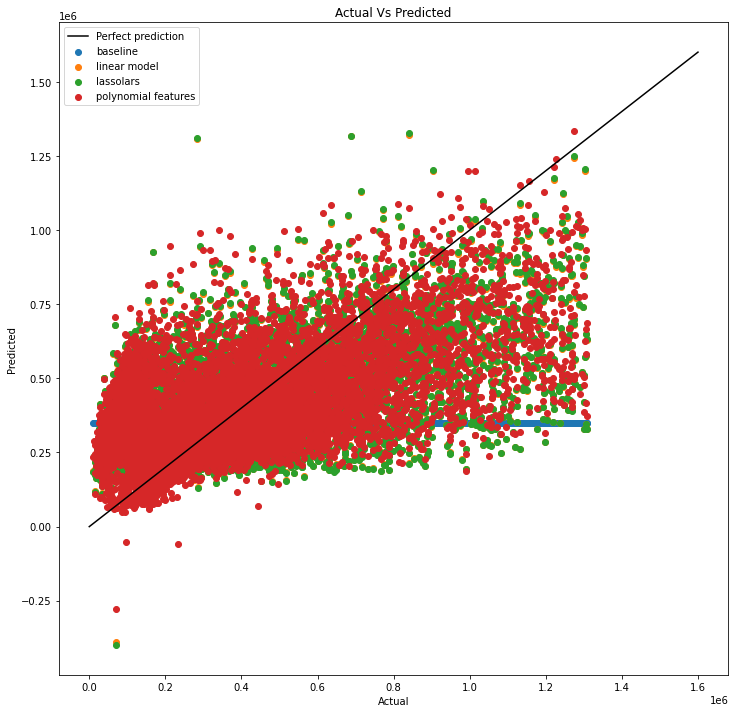

In [295]:
# lets try to plot these values

plt.figure(figsize = (12,12))
plt.scatter(y_train, y_baseline_pred, label = 'baseline')

plt.scatter(y_train, y_lm2_pred, label = 'linear model')

plt.scatter(y_train, y_lars2_pred, label = 'lassolars')


plt.scatter(y_train, y_lm_squared2_pred, label = 'polynomial features')

plt.plot([0, 1600000], [0, 1600000], ls = "-" , c = 'black', label = 'Perfect prediction')

plt.xlabel("Actual")

plt.ylabel("Predicted")

plt.title('Actual Vs Predicted')

plt.legend()

plt.show()

## Lets Validate with all models

### Linear Regression 

In [300]:
# predict with the object
y_lm_val_pred = lm2.predict(x_validate_scaled)


lm_val_rmse = (mean_squared_error(y_validate, y_lm_val_pred)) **(1/2)

print('Lm_validate_RMSE:', lm_val_rmse)

Lm_validate_RMSE: 234563.57153788366


### LassoLars

In [301]:
# predict with the object
y_lars_val_pred = lars2.predict(x_validate_scaled)


lars_val_rmse = (mean_squared_error(y_validate, y_lars_val_pred)) **(1/2)

print('Lars_validate_RMSE:', lars_val_rmse)

Lars_validate_RMSE: 234563.02396658767


### Ploynomial Features

In [304]:
# transform with the object
x_validate_scaled_squared = pf2.transform(x_validate_scaled)


# predict with the object

y_lm_squared_val_pred = lm_squared2.predict(x_validate_scaled_squared)


lm_squared_val_rmse = (mean_squared_error(y_validate, y_lm_squared_val_pred)) **(1/2)

print('Lm_squared_validate_RMSE:',lm_squared_val_rmse )

Lm_squared_validate_RMSE: 225547.68904089223


## Our polynomial features of second degree performed better compared to other models. So, we will use this model with our test data

In [307]:
# transforming our x variables
x_test_scaled_squared = pf2.transform(x_test_scaled)


# predicting with our object

y_lm_squared_test_pred = lm_squared2.predict(x_test_scaled_squared)


# calculating our RMSE
lm_squared_test_rmse = (mean_squared_error(y_test, y_lm_squared_test_pred)) **(1/2)


print('Lm_squared_test_RMSE:', lm_squared_test_rmse)
print()
print('Our baseline RMSE: ', baseline_rmse)

Lm_squared_test_RMSE: 377758.8913166587

Our baseline RMSE:  286498.8581858487


**Our model performed worst than the baseline with test data. That means, it was overfitted when we used all the variables**